## Analysis 2 of 4 for K4K Community Capstone

1) Describe trends of past donors <-- this notebook

2) **Describe subset of matches, exploiting attributes from PDF dataset**

3) Algorithm: score all companies in PDF based on similarity to matched ones

4) If time, annotate synthetic donate = 0  and try classification model

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [13]:
df = pd.read_pickle('../Data/df_matches.pickle')

In [14]:
col_names = df.columns
new_cols = []
for c in col_names:
    c = c.upper()
    c = c.replace(' ', '_')
    new_cols.append(c)

df.columns = new_cols

In [15]:
df = df.rename(columns = {'DOLLAR_EQUIVALENT_AMOUNT': 'DOL_AMOUNT'})

In [110]:
df.head(10).T.to_clipboard()

''' 
Cols to analyze: 

COMPANY, 
DOL_AMOUNT,
ID,
ADDRESS,
AVIS,
CONTRIBUTION,
DOMAINE_DINTERET, # to do later
FILIALE_DE, 
ISFOUNDATION,
LIMITES_GEOG,
NOMBRE_DEMPLOYES,
PRINCIP_FILIALES #make a dummy of it
SECTEUR_INDUSTRIEL, 
ACTIF_FND,
CATEGORIE_FND
DOMAINES_DINTERET_FND,
ECHELLEDONS_FND,
PROJETS_PRIVILEGIES_FND,
TOTAL_ANNUEL_FND,

'''

' COMPANY, \nDOL_AMOUNT,\nID,\nADDRESS,\nAVIS,\nCONTRIBUTION,\nDOMAINE_DINTERET, # to do later\nFILIALE_DE, \nISFOUNDATION,\nLIMITES_GEOG,\nNOMBRE_DEMPLOYES,\nPRINCIP_FILIALES #make a dummy of it\nSECTEUR_INDUSTRIEL, \nACTIF_FND,\nCATEGORIE_FND\nDOMAINES_DINTERET_FND,\nECHELLEDONS_FND,\nPROJETS_PRIVILEGIES_FND,\nTOTAL_ANNUEL_FND,\n\n\n\n\n'

In [24]:
df['COUNT'] = 1
df['ISFOUNDATION'] = df.ID_FND.isna().astype(int)

AttributeError: 'DataFrame' object has no attribute 'ID_FND'

In [43]:
def bar_line_plot(df, y1, y2, x, y1_axis = None, y2_axis = None,
 y1_label = None, y2_label= None, title = None, legend=True):

    import matplotlib.ticker as mtick

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)

    fig, ax = plt.subplots(1,1, figsize = (12,4))

    sns.barplot( ax = ax, data = df, y = y1, x=x, estimator = np.mean, ci = None, label = y1_label)

    ax2 = ax.twinx()
    sns.lineplot(ax = ax2, data = df,y = y2, x=x, estimator = np.sum, ci = None, label=y2_label)

    ax2.lines[0].set_linestyle("--")
    ax2.lines[0].set_color('red')

    ax.yaxis.set_major_formatter(tick)

    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=40)

    ax2.set_ylim(bottom=0)


    if title != None:
        ax.set_title(title)
    if y1_axis != None:
        ax.set_ylabel(y1_axis)
    if y2_axis != None:
        ax2.set_ylabel(y2_axis)
    
    if legend:
        plt.legend(loc = 'lower center')
    plt.show()


In [52]:
sector_list = ['SECTOR_FABRICATION',
       'SECTOR_FINANCIERS', 'SECTOR_COMMERCE', 'SECTOR_CONSTRUCTION',
       'SECTOR_TRANSPORT', 'SECTOR_GESTION', 'SECTOR_SYSTEMS',
       'SECTOR_ALIMENTATION', 'SECTOR_SANTE_ASSURANCE', 'SECTOR_OTHER']

In [58]:
df1 = df.groupby(['COMPANY','NOMBRE_DEMPLOYES','PRINCIP_FILIALES','LIMITES_GEOG',
 'CONTRIBUTION', 'FILIALE_DE', 'COUNT', 'ISFOUNDATION','SECTEUR_INDUSTRIEL', 'MAIN_TOPIC' ] + sector_list[:],\
     dropna=False, as_index=False)['DOL_AMOUNT'].mean()

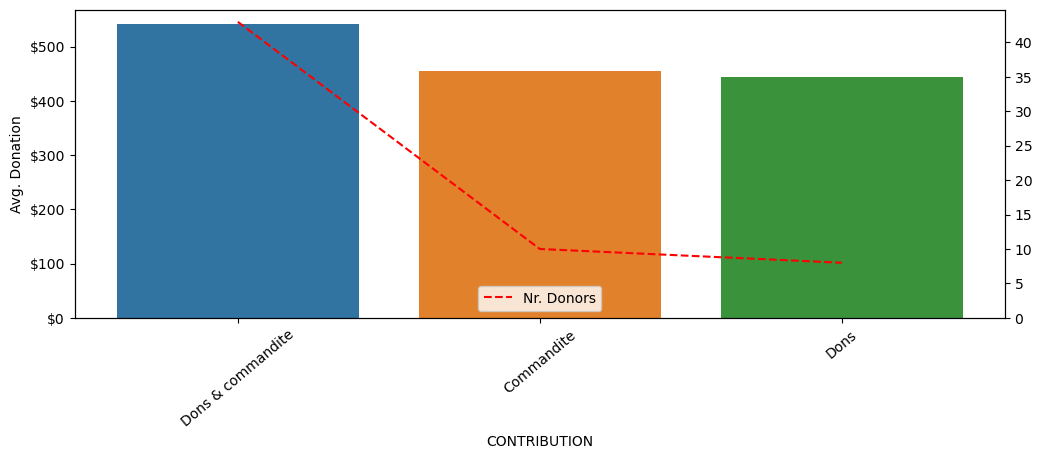

In [60]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='CONTRIBUTION', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

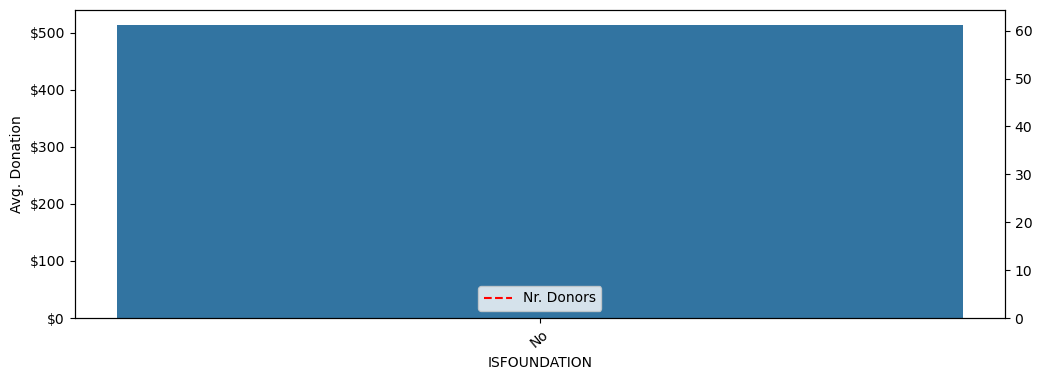

In [61]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='ISFOUNDATION', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

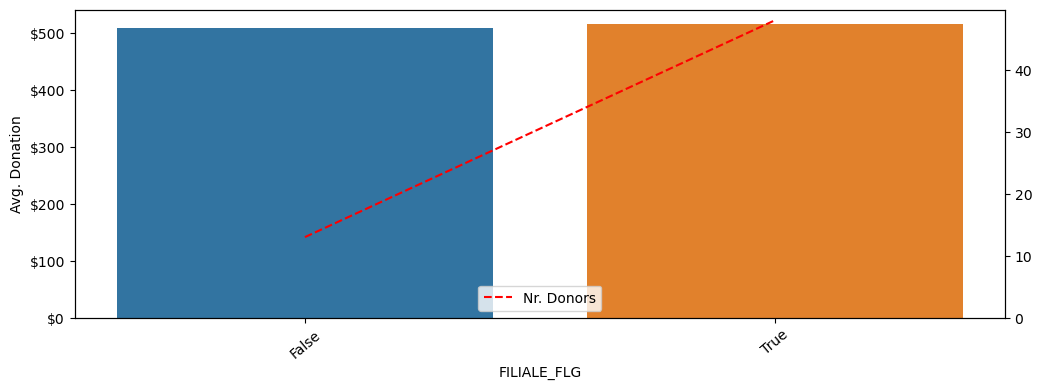

In [62]:
df1['FILIALE_FLG'] = df1.FILIALE_DE.isna()

bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='FILIALE_FLG', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [63]:
df1.LIMITES_GEOG = df1.LIMITES_GEOG.str.strip('.').astype(str)

mapper = { 'locales, régionales et nationales' :'regional and national',
'locales' : 'locals',
'nationales' : 'nationals',
'régionales' :'regionals',
'nationales, régionales au Québec' : 'regional and national',
'régionales et nationales' : 'regional and national',
'locales, régionales':'local and regional',
'locales et régionales':'local and regional',
'locales, nationales et internationales':'international',
'nan':'nan',
'nationales et internationales':'international'}

df1.LIMITES_GEOG = df1.LIMITES_GEOG.map(mapper)

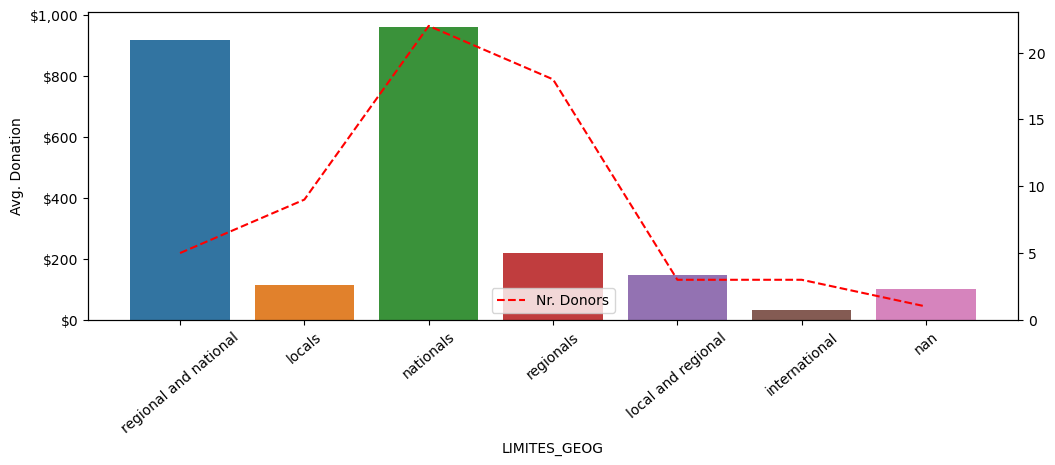

In [64]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='LIMITES_GEOG', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [ ]:

df1.NOMBRE_DEMPLOYES = df1.NOMBRE_DEMPLOYES.str.replace(' ','').astype(float)
df1['NR_EMPLOYEE_BINS'], bins= pd.qcut(df1.NOMBRE_DEMPLOYES, q = 5, retbins=True)
df1 = df1.sort_values(['NR_EMPLOYEE_BINS'])
df1.NR_EMPLOYEE_BINS = df1.NR_EMPLOYEE_BINS.astype(str)

In [ ]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='NR_EMPLOYEE_BINS', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [ ]:
df1['FILIALE_FLG2'] = df1.PRINCIP_FILIALES.isna()

bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='FILIALE_FLG2', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [51]:
df.columns

Index(['COMPANY', 'ADDED_MODIFIED', 'DOLLAR_AMOUNT_FLOAT',
       'MONEYPRIZE_RECEIVED', 'DONATION_DETAILS', 'YEAR', 'DON_DETAIL_AMOUNT',
       'DOL_AMOUNT', 'DON_DETAIL_TXT', 'ORGANIZATION', 'DONOR', 'ID',
       '2E_CONTACT_POUR', 'ADDRESS', 'AVIS', 'CONTACT', 'CONTRIBUTION',
       'COURRIEL', 'DDD', 'DOMAINE_DINTERET', 'FAF', 'FAX', 'FILIALE_DE',
       'ISFOUNDATION', 'LANGUE', 'LIMITES_GEOG', 'N_DE_TEL', 'NAME',
       'NBRE_DE_SUCC', 'NOMBRE_DEMPLOYES', 'NOTE', 'POSTE', 'PRINCIP_FILIALES',
       'SECTEUR_INDUSTRIEL', 'SITE_WEB', 'SECTOR_FABRICATION',
       'SECTOR_FINANCIERS', 'SECTOR_COMMERCE', 'SECTOR_CONSTRUCTION',
       'SECTOR_TRANSPORT', 'SECTOR_GESTION', 'SECTOR_SYSTEMS',
       'SECTOR_ALIMENTATION', 'SECTOR_SANTE_ASSURANCE', 'SECTOR_OTHER',
       'INTEREST_DOMAIN_CLEAN', 'MAIN_TOPIC', 'MAIN_TOPIC_SCORE',
       'SECONDARY_TOPIC', 'SECONDARY_TOPIC_SCR', 'ACTIF', 'ADDRESS_FND',
       'AVIS_FND', 'CATEGORIE', 'CONTACT_FND', 'COURRIEL_FND', 'DATE_APPROB',
       'DATE

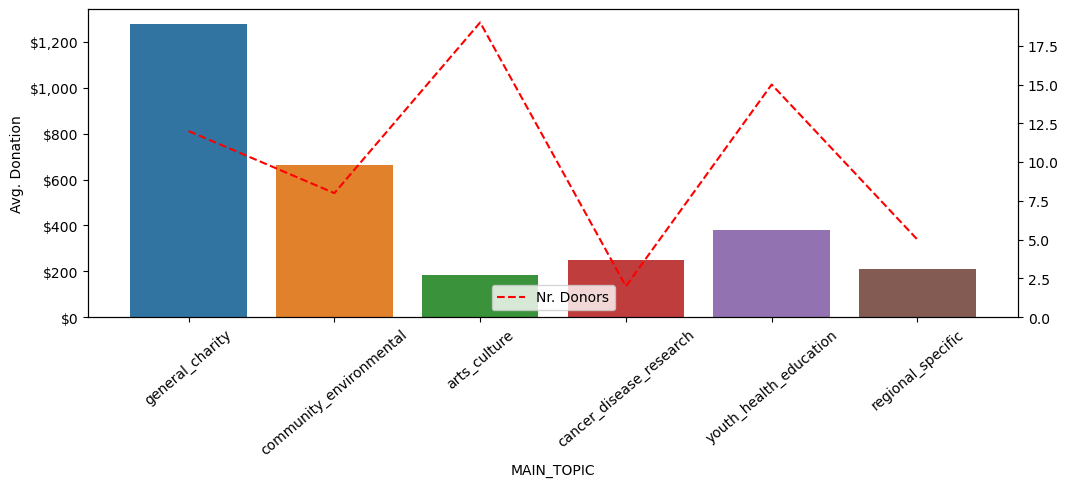

In [48]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='MAIN_TOPIC', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [ ]:
# what are the interest domains of the companies that have donated most to K4K historically

In [150]:
df.columns

Index(['COMPANY', 'ADDED_MODIFIED', 'DOLLAR_AMOUNT_FLOAT',
       'MONEYPRIZE_RECEIVED', 'DONATION_DETAILS', 'YEAR', 'DON_DETAIL_AMOUNT',
       'DOL_AMOUNT', 'DON_DETAIL_TXT', 'ORGANIZATION', 'DONOR', 'ID',
       '2E_CONTACT_POUR', 'ADDRESS', 'AVIS', 'CONTACT', 'CONTRIBUTION',
       'COURRIEL', 'DDD', 'DOMAINE_DINTERET', 'FAF', 'FAX', 'FILIALE_DE',
       'ISFOUNDATION', 'LANGUE', 'LIMITES_GEOG', 'N_DE_TEL', 'NAME',
       'NBRE_DE_SUCC', 'NOMBRE_DEMPLOYES', 'NOTE', 'POSTE', 'PRINCIP_FILIALES',
       'SECTEUR_INDUSTRIEL', 'SITE_WEB', 'SECTOR_FABRICATION',
       'SECTOR_FINANCIERS', 'SECTOR_COMMERCE', 'SECTOR_CONSTRUCTION',
       'SECTOR_TRANSPORT', 'SECTOR_GESTION', 'SECTOR_SYSTEMS',
       'SECTOR_ALIMENTATION', 'SECTOR_SANTE_ASSURANCE', 'SECTOR_OTHER',
       'INTEREST_DOMAIN_CLEAN', 'MAIN_TOPIC', 'MAIN_TOPIC_SCORE',
       'SECONDARY_TOPIC', 'SECONDARY_TOPIC_SCR', 'ACTIF', 'ADDRESS_FND',
       'AVIS_FND', 'CATEGORIE', 'CONTACT_FND', 'COURRIEL_FND', 'DATE_APPROB',
       'DATE

In [153]:
df_topics = df.groupby(['COMPANY', 'MAIN_TOPIC', 'SECONDARY_TOPIC'])['DOL_AMOUNT'].sum().reset_index()

In [158]:
df_topics.sort_values('DOL_AMOUNT', ascending=False ).head(10)

,COMPANY,MAIN_TOPIC,SECONDARY_TOPIC,DOL_AMOUNT
15,CORBEC,general_charity,community_environmental,37400.0
16,CP,youth_health_education,general_charity,18000.0
19,DELMAR,community_environmental,arts_culture,14000.0
59,VIA,community_environmental,arts_culture,9702.0
14,CN,arts_culture,regional_specific,8794.0
60,WESTJET,youth_health_education,general_charity,4600.0
20,DELTA,youth_health_education,community_environmental,3000.0
57,ULTRAMAR,cancer_disease_research,arts_culture,2000.0
24,ENERGIE CARDIO,youth_health_education,community_environmental,1915.0
43,RBC,arts_culture,youth_health_education,1600.0


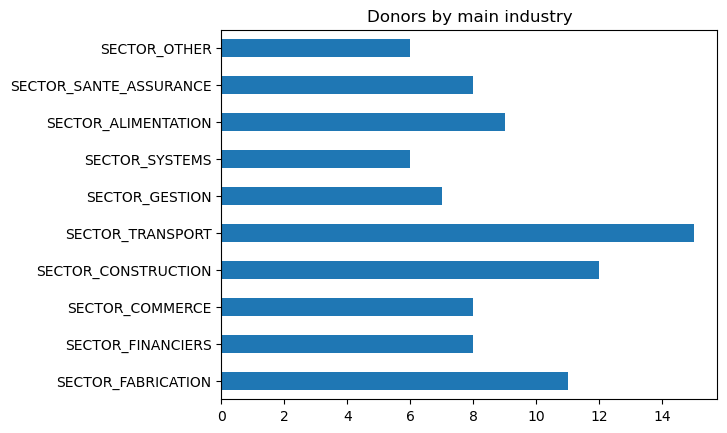

In [99]:
### Sector

df1[sector_list].sum().plot(kind = 'barh', title = 'Donors by main industry')
plt.show()

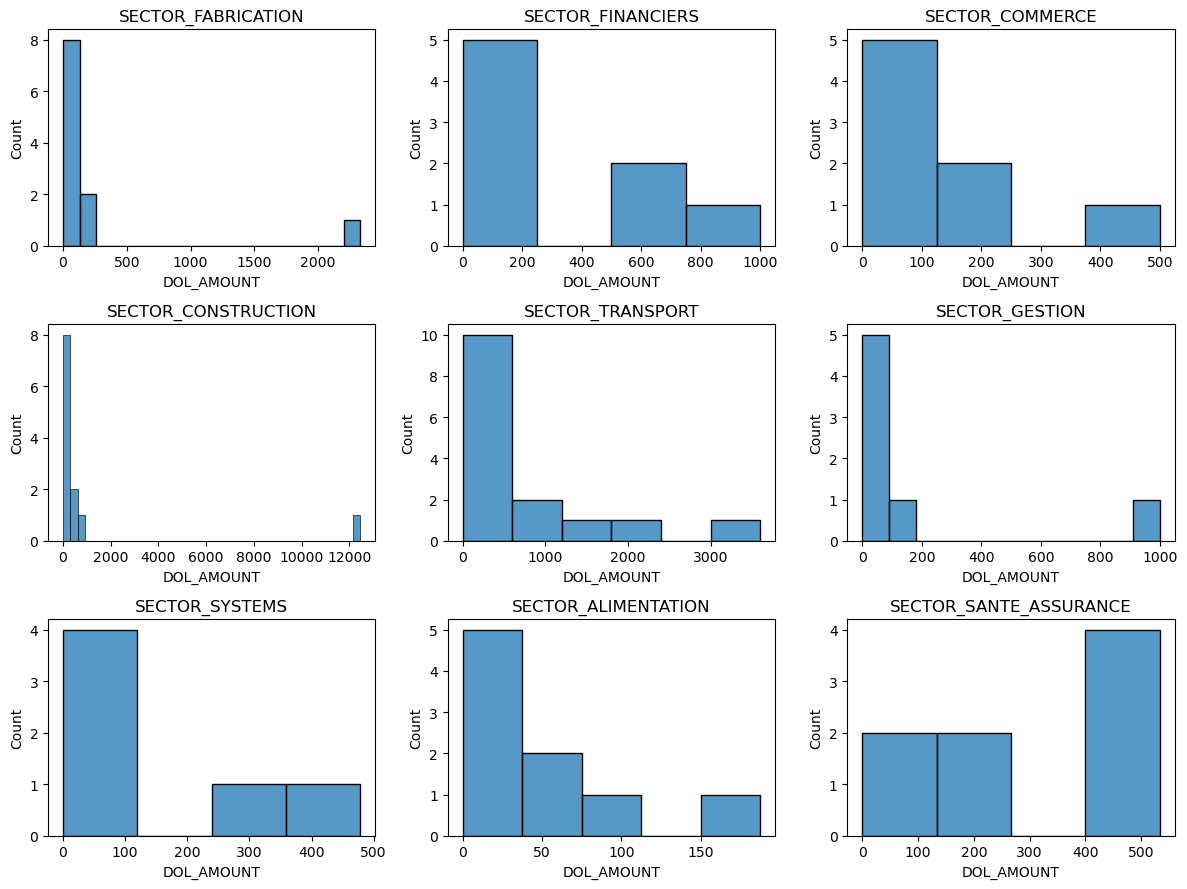

In [144]:


fig, ax = plt.subplots(3,3, figsize = (12,9))
s = sector_list



t = 0
for i in range(3):
    for j in range(3):
        sns.histplot(ax = ax[i][j], data=df1[df1[s[t]] == 1], x = 'DOL_AMOUNT')
        ax[i][j].set_title(s[t])
        t += 1

fig.tight_layout()
plt.show()
